NAME:Amit Prajapati


# Perform data cleaning, processing, and exploratory data analysis (EDA) on the dataset loaded from "Paytm_UPI_Statement.xlsx".

# Import Libraries and Load Excel File

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Paytm_UPI_Statement.xlsx"
excel_file = pd.ExcelFile(file_path)


print(excel_file.sheet_names)
df = pd.read_excel(file_path, sheet_name="Passbook Payment History")
df.head(20)


['Passbook Payment History']


,Date,Time,Transaction Details,Your Account,Amount,UPI Ref No.,Order ID,Remarks,Tags,Comment
0,08/07/2025,13:48:35,Paid to Lava Manikya Gotivada,Bank Of Baroda - 63,-22.00,687489014534,NaN,NaN,#🥘 Food,NaN
1,08/07/2025,08:35:29,Paid to Nagpur Municipal Corporation,Bank Of Baroda - 63,-19.00,687476552882,NaN,NaN,#✈️ Travel,NaN
2,07/07/2025,21:19:50,Money sent to Ashay Pramod Badalwar,Bank Of Baroda - 63,-500.00,687468474802,NaN,NaN,#💵 Transfers,NaN
3,07/07/2025,12:03:26,Paid to Nagpur Municipal Corporation,Bank Of Baroda - 63,-24.00,386219016613,NaN,NaN,#✈️ Travel,NaN
4,05/07/2025,17:01:05,Paid to Indian Railways Ticketing,Bank Of Baroda - 63,-10.00,687361491498,NaN,NaN,#✈️ Travel,NaN
5,05/07/2025,14:04:10,Paid to Indian Railways Ticketing,Bank Of Baroda - 63,-10.00,687354410311,NaN,NaN,#✈️ Travel,NaN
6,05/07/2025,14:00:29,Paid to Mr Mahadeb Maity,Bank Of Baroda - 63,-12.00,518628205875,NaN,NaN,#🥘 Food,NaN
7,04/07/2025,20:05:23,Paid to Ganesh GENERAL Store,Bank Of Baroda - 63,-10.00,287646886366,NaN,NaN,#🛒 Groceries,NaN
8,04/07/2025,19:31:05,Paid to ABUHANZULASHAIKH,Bank Of Baroda - 63,-30.00,687325371488,NaN,NaN,#🥘 Food,NaN
9,04/07/2025,17:50:40,Paid to Tariq Saleem Shaikh,Bank Of Baroda - 63,-250.00,687318689409,NaN,NaN,#🛒 Groceries,NaN


# Step 2: Data Cleaning and Preprocessing

In [43]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', ''), errors='coerce')

df['Transaction Type'] = df['Amount'].apply(lambda x: 'Credit' if x > 0 else 'Debit')
df[['Date', 'Amount', 'Transaction Type', 'Tags']].head()


,Date,Amount,Transaction Type,Tags
0,2025-07-08,-22.0,Debit,#🥘 Food
1,2025-07-08,-19.0,Debit,#✈️ Travel
2,2025-07-07,-500.0,Debit,#💵 Transfers
3,2025-07-07,-24.0,Debit,#✈️ Travel
4,2025-07-05,-10.0,Debit,#✈️ Travel


# Step 3: Handle Missing Data

In [45]:
print(df.isnull().sum())
df['Tags'] = df['Tags'].fillna('Uncategorized')

Date                     0
Time                     0
Transaction Details      0
Your Account             0
Amount                   0
UPI Ref No.              0
Order ID               608
Remarks                417
Tags                     0
Comment                615
Transaction Type         0
dtype: int64


# Step 4: Summary of Dataset

In [47]:
import pandas as pd

summary = {
    'Total Transactions': len(df),
    'Total Spent': df[df['Transaction Type'] == 'Debit']['Amount'].sum(),
    'Total Received': df[df['Transaction Type'] == 'Credit']['Amount'].sum(),
    'Net Movement': df['Amount'].sum(),
    'Unique Payees': df['Transaction Details'].nunique()
}

summary_df = pd.DataFrame(summary.items(), columns=['Metric', 'Value'])
print(summary_df.to_string(index=False))


            Metric     Value
Total Transactions    615.00
       Total Spent -59793.67
    Total Received  11127.00
      Net Movement -48666.67
     Unique Payees    272.00


# Step 5: Expense Category Analysis

Tags
🏦 Financial Services      -50.00
🧾 Bill Payments          -200.80
🏦 Services               -390.00
✈️ Travel                -683.00
🛍 Shopping               -935.00
🔄 Miscellaneous         -1563.00
🛒 Groceries             -1955.00
🥘 Food                  -3508.00
🏥 Medical               -4474.00
💵 Transfers             -8531.00
Uncategorized          -37503.87
Name: Amount, dtype: float64


/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_5565/990755857.py:19: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_5565/990755857.py:19: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_5565/990755857.py:19: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_5565/990755857.py:19: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_5565/990755857.py:19: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yq/86z_7n5n7yd0gz0bzwk356w00000gn/T/ipykernel_55

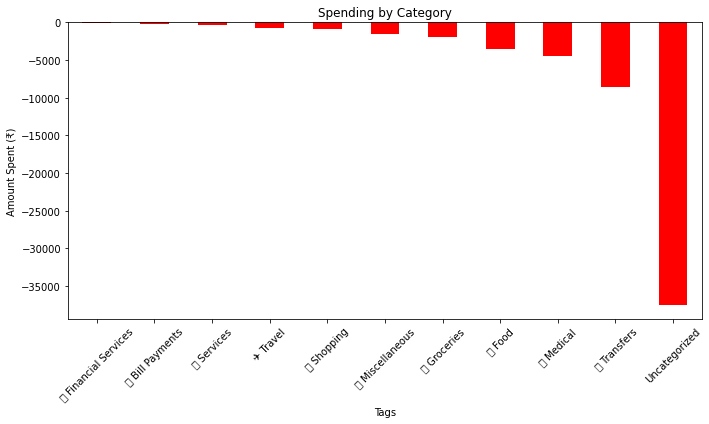

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', ''), errors='coerce')
df['Transaction Type'] = df['Amount'].apply(lambda x: 'Credit' if x > 0 else 'Debit')
df['Tags'] = df['Tags'].fillna('Uncategorized')

df['Tags'] = df['Tags'].str.replace('#', '').str.strip()
df_spent = df[df['Transaction Type'] == 'Debit']

spending_by_category = df_spent.groupby('Tags')['Amount'].sum().sort_values(ascending=False)

print(spending_by_category)

spending_by_category.plot(kind='bar', figsize=(10,6), color='RED', title='Spending by Category')
plt.ylabel('Amount Spent (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 6: Monthly Transaction & Balance

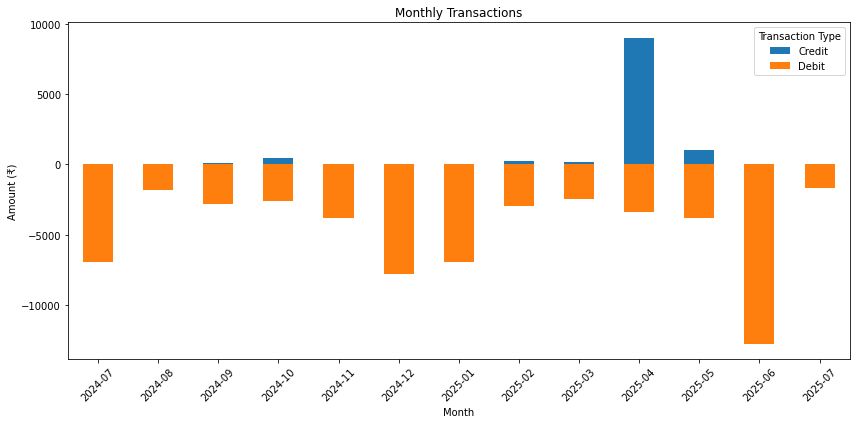

In [26]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_summary = df.groupby(['Month', 'Transaction Type'])['Amount'].sum().unstack().fillna(0)

monthly_summary.plot(kind='bar', stacked=True, figsize=(12,6), title='Monthly Transactions')
plt.ylabel("Amount (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# step 7: Line Graph of Balance 

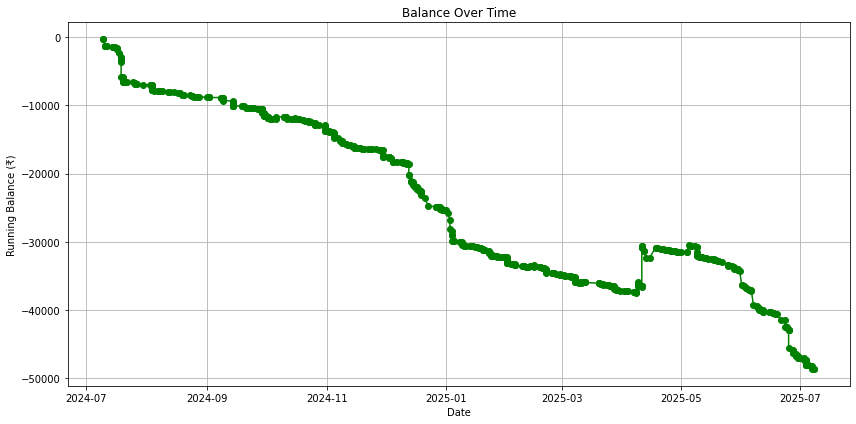

In [53]:
df = df.sort_values('Date')
df['Balance'] = df['Amount'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Balance'], marker='o', linestyle='-', color='green')
plt.title("Balance Over Time")
plt.xlabel("Date")
plt.ylabel("Running Balance (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
df['Amount'] = pd.to_numeric(df['Amount'].astype(str).str.replace(',', ''), errors='coerce')
df['Transaction Type'] = df['Amount'].apply(lambda x: 'Credit' if x > 0 else 'Debit')


In [57]:
total_spent = df[df['Transaction Type'] == 'Debit']['Amount'].sum()
total_received = df[df['Transaction Type'] == 'Credit']['Amount'].sum()

print(f" Total Money Spent: ₹{abs(total_spent):,.2f}")
print(f" Total Money Received: ₹{total_received:,.2f}")


 Total Money Spent: ₹59,793.67
 Total Money Received: ₹11,127.00


In [ ]:
Data Usage Warning & Disclaimer
Warning:
This dataset contains sensitive financial transaction information and is shared strictly for educational and analytical purposes only.
Unauthorized use, including but not limited to attempts to:
Identify individuals,
Commit fraud,
Reverse-engineer personal details,
Exploit patterns for malicious or commercial purposes,
is strictly prohibited and may constitute a violation of privacy laws and cybersecurity regulations under applicable jurisdictions (e.g., IT Act 2000 in India, GDPR in the EU, etc.).
All users are hereby notified that misuse of this data may result in:
Legal action,
Permanent exclusion from data-sharing platforms,
And/or being reported to relevant authorities.
✅ Use Responsibly – Always anonymize, aggregate, and comply with ethical and legal standards when working with any dataset.